**Video Link = **

# 1. Check out the City of Los Angeles public data sources and test the hypothesis that the statistics of affordable housing projects” (government housing for low-income people) in a ZIP code has a relation to the health inspection scores of the restaurants in that ZIP code.

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns  # Import seaborn for making statistical graphics with enhanced visualizations
#[1][2][3]

In [ ]:
inspection = pd.read_csv('Restaurant_and_Market_Health_Inspections.csv')
# Loading the 'Restaurant_and_Market_Health_Inspections.csv' file into a pandas DataFrame named 'inspection'.
# This DataFrame will store the data from the CSV file, allowing for easy manipulation and analysis.
housing= pd.read_csv('LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv')
# Loading the 'LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv' file into a pandas DataFrame named 'housing'.
# This DataFrame will contain the data related to affordable housing projects in LA from 2003 to the present.


# **INSPECTION DATA EDA**

In [ ]:
# Check Data Types
print(inspection.dtypes)  # Display the data types of each column in the inspection DataFrame


serial_number          object
activity_date          object
facility_name          object
score                   int64
grade                  object
service_code            int64
service_description    object
employee_id            object
facility_address       object
facility_city          object
facility_id            object
facility_state         object
facility_zip           object
owner_id               object
owner_name             object
pe_description         object
program_element_pe      int64
program_name           object
program_status         object
record_id              object
dtype: object


In [ ]:
inspection['facility_zip'] = inspection['facility_zip'].astype(str)  # Ensure it's a string
inspection['facility_zip'] = inspection['facility_zip'].str.replace('-', '', regex=False)  # Remove hyphens
inspection['facility_zip'] = inspection['facility_zip'].str[:5]  # Keep only the first 5 digits

In [ ]:
# Convert data types
inspection['activity_date'] = pd.to_datetime(inspection['activity_date'])  # Convert the 'activity_date' column to datetime format
inspection['facility_zip'] = inspection['facility_zip'].astype(int)  # Convert the 'facility_zip' column to integer type


<ipython-input-6-729f152e976e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inspection['activity_date'] = pd.to_datetime(inspection['activity_date'])  # Convert the 'activity_date' column to datetime format


In [ ]:
print(inspection.dtypes)

serial_number                  object
activity_date          datetime64[ns]
facility_name                  object
score                           int64
grade                          object
service_code                    int64
service_description            object
employee_id                    object
facility_address               object
facility_city                  object
facility_id                    object
facility_state                 object
facility_zip                    int64
owner_id                       object
owner_name                     object
pe_description                 object
program_element_pe              int64
program_name                   object
program_status                 object
record_id                      object
dtype: object


In [ ]:
# Analyze unique values in specific columns
print(inspection['facility_zip'].nunique())  # Print the number of unique ZIP codes in the 'facility_zip' column
print(inspection['facility_name'].nunique())  # Print the number of unique facility names in the 'facility_name' column
print(inspection['grade'].unique())  # Print the unique values in the 'grade' column

99
12071
['A' 'B' 'C' ' ' nan]


In [ ]:
# Clean and handle missing data in the 'grade' column
inspection['grade'].replace(' ', 'Ungraded', inplace=True)  # Replace empty spaces in the 'grade' column with 'Ungraded'
inspection['grade'].fillna('Ungraded', inplace=True)  # Fill any NaN values in the 'grade' column with 'Ungraded'
print(inspection['grade'].unique())  # Print the unique values in the 'grade' column after cleaning

['A' 'B' 'C' 'Ungraded']


<ipython-input-11-3bfb0ffabe85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=inspection, palette='pastel', order=['A', 'B', 'C', 'Ungraded'])  # Create a count plot of inspection grades with a pastel color palette and a specific order


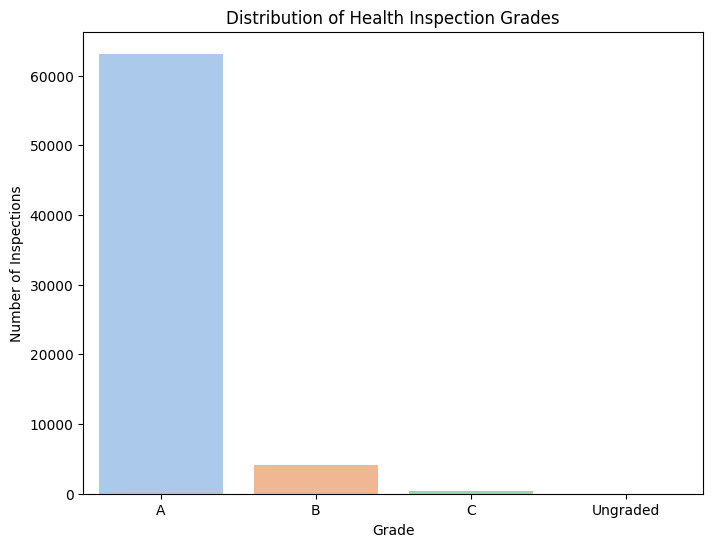

In [ ]:
# Visualize the distribution of health inspection grades
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
sns.countplot(x='grade', data=inspection, palette='pastel', order=['A', 'B', 'C', 'Ungraded'])  # Create a count plot of inspection grades with a pastel color palette and a specific order
plt.title('Distribution of Health Inspection Grades')  # Set the title of the plot
plt.xlabel('Grade')  # Label the x-axis as 'Grade'
plt.ylabel('Number of Inspections')  # Label the y-axis as 'Number of Inspections'
plt.show()  # Display the plot
#[2]

In [ ]:
# Display unique values in the 'score' column
print(inspection['score'].unique())  # Print the unique values in the 'score' column of the inspection DataFrame

[ 95  92  93  94  91  97  90  98  85  82  96 100  84  86  99  80  83  81
  78  73  87  72  77  88  76  74  75  89  70  71  79  65  64  68  67  66]


In [ ]:
# Count and display the most frequent ZIP codes
zip_code_counts = inspection['facility_zip'].value_counts()  # Count occurrences of each ZIP code in the 'facility_zip' column
print(zip_code_counts.head(10))  # Print the top 10 ZIP codes with the highest number of inspections

facility_zip
90012    2822
90028    2651
90045    2645
90015    2190
90036    2133
90006    2113
90027    1931
90020    1853
90025    1829
90005    1656
Name: count, dtype: int64


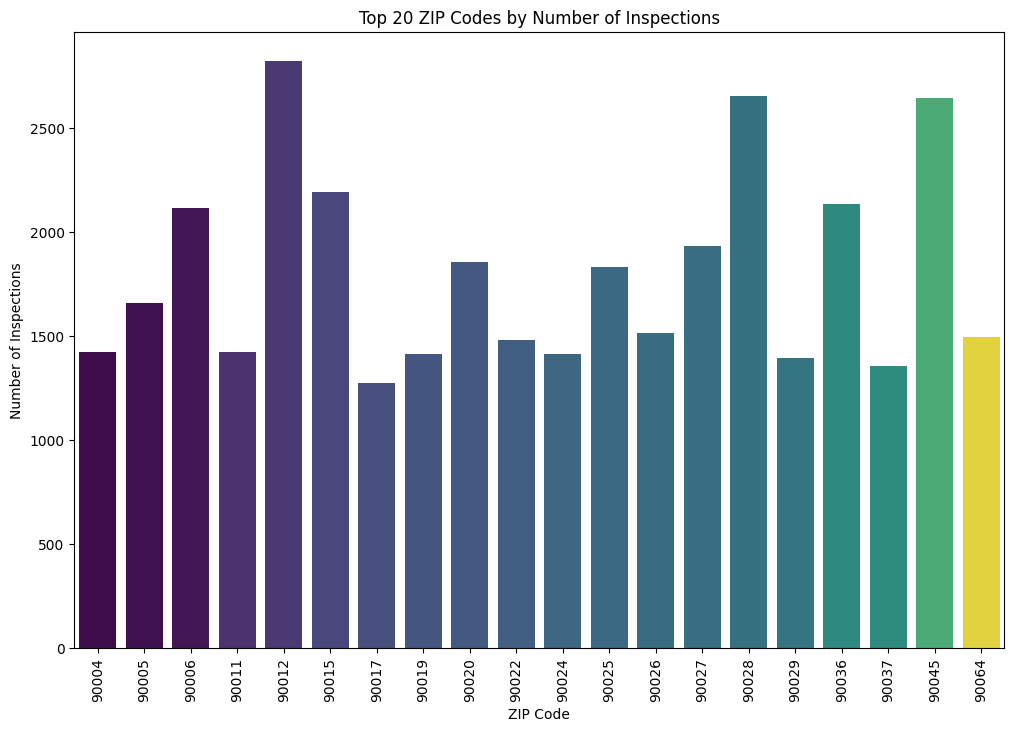

In [ ]:
plt.figure(figsize=(12, 8))  # Create a new figure with a specified size
sns.barplot(x=zip_code_counts.index[:20], y=zip_code_counts.values[:20], palette='viridis', hue=zip_code_counts.index[:20], dodge=False)  # Create a bar plot for the top 20 ZIP codes by number of inspections using the 'viridis' color palette
plt.title('Top 20 ZIP Codes by Number of Inspections')  # Set the title of the plot
plt.xlabel('ZIP Code')  # Label the x-axis as 'ZIP Code'
plt.ylabel('Number of Inspections')  # Label the y-axis as 'Number of Inspections'
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.legend([],[], frameon=False)  # Remove the legend to avoid unnecessary space if not needed
plt.show()  # Display the plot
#[2]

facility_zip
90053    100.000000
91307     99.000000
90222     98.500000
90201     98.000000
90220     98.000000
91326     98.000000
91505     97.250000
90089     96.903780
92880     96.500000
90095     96.133333
91340     96.000000
91602     95.666667
91401     95.500000
91006     95.500000
90054     95.173913
91325     95.125000
91601     95.000000
90049     94.968162
90059     94.810888
90007     94.804917
90002     94.649057
90071     94.588580
90056     94.532258
90013     94.505958
91367     94.428571
90062     94.322581
90037     94.289513
90014     94.218085
90232     94.214286
90079     94.208333
Name: score, dtype: float64


<ipython-input-15-a3d07edf022c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores_by_zip.index[:20], y=avg_scores_by_zip.values[:20], palette='viridis')  # Create a bar plot for the top 20 ZIP codes by average inspection score using the 'viridis' color palette


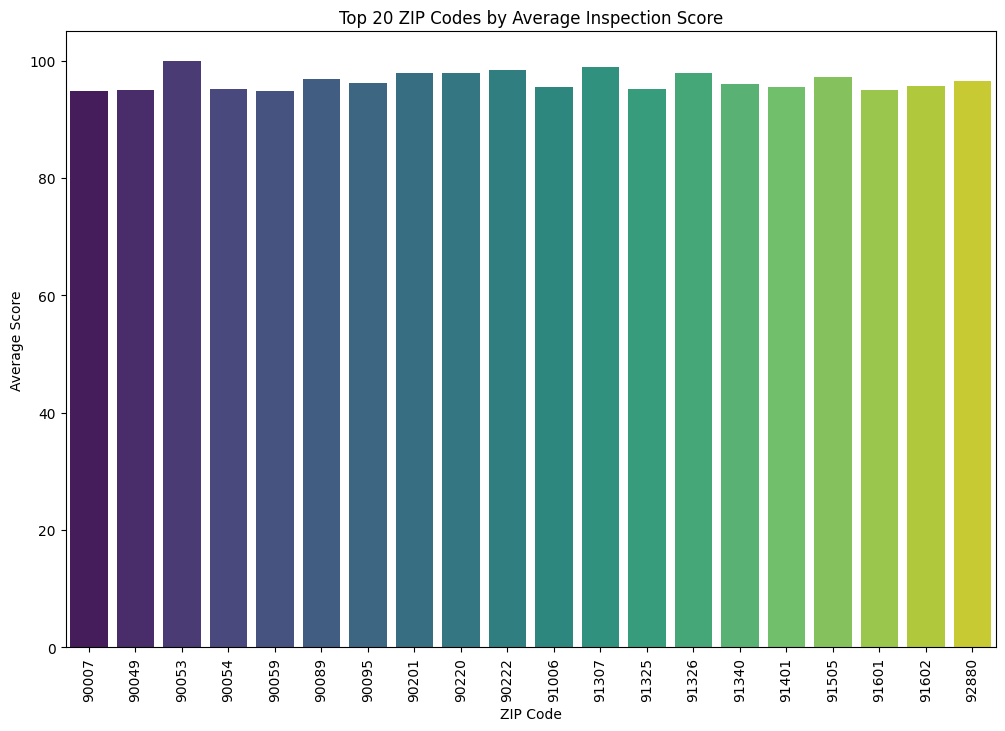

In [ ]:
# Calculate average inspection scores by ZIP code
avg_scores_by_zip = inspection.groupby('facility_zip')['score'].mean().sort_values(ascending=False)  # Group by 'facility_zip', calculate mean 'score' for each ZIP code, and sort in descending order
print(avg_scores_by_zip.head(30))  # Display the top 30 ZIP codes with the highest average scores

# Visualize the top 20 ZIP codes by average inspection score
plt.figure(figsize=(12, 8))  # Create a new figure with a specified size
sns.barplot(x=avg_scores_by_zip.index[:20], y=avg_scores_by_zip.values[:20], palette='viridis')  # Create a bar plot for the top 20 ZIP codes by average inspection score using the 'viridis' color palette
plt.title('Top 20 ZIP Codes by Average Inspection Score')  # Set the title of the plot
plt.xlabel('ZIP Code')  # Label the x-axis as 'ZIP Code'
plt.ylabel('Average Score')  # Label the y-axis as 'Average Score'
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot

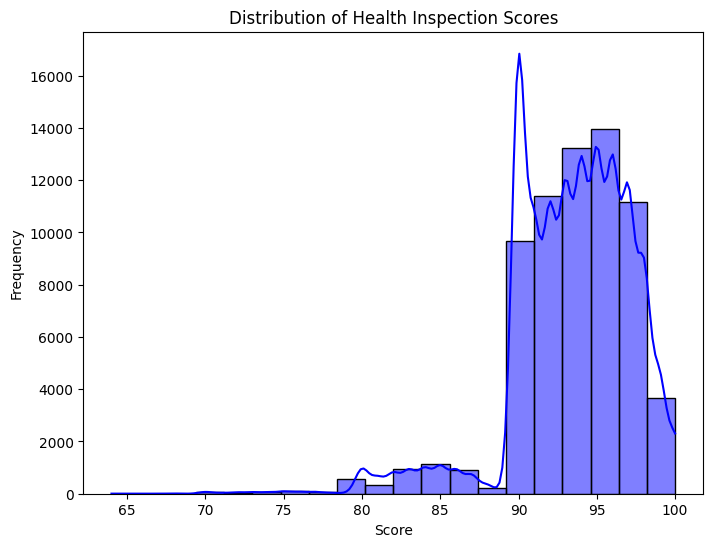

In [ ]:
# Visualize the distribution of health inspection scores
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
sns.histplot(inspection['score'], bins=20, kde=True, color='blue')  # Create a histogram of the 'score' column with 20 bins, including a KDE (Kernel Density Estimate) curve, and color the plot blue
plt.title('Distribution of Health Inspection Scores')  # Set the title of the plot
plt.xlabel('Score')  # Label the x-axis as 'Score'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
plt.show()  # Display the plot


In [ ]:
# Display the count of missing values for each column
print(inspection.isnull().sum())  # Print the number of missing (NaN) values for each column in the inspection DataFrame

serial_number           0
activity_date           0
facility_name           0
score                   0
grade                   0
service_code            0
service_description     0
employee_id             0
facility_address        0
facility_city           0
facility_id             0
facility_state          0
facility_zip            0
owner_id                0
owner_name              0
pe_description          0
program_element_pe      0
program_name           29
program_status          0
record_id               0
dtype: int64


In [ ]:
# Remove rows with missing values in specified columns
inspection.dropna(subset=['pe_description', 'program_element_pe', 'program_name', 'program_status', 'record_id'], inplace=True)  # Drop rows where any of the specified columns have NaN values and modify the DataFrame in place

In [ ]:
print(inspection.isnull().sum())  # Print the number of missing (NaN) values for each column in the inspection DataFrame after handling missing values

serial_number          0
activity_date          0
facility_name          0
score                  0
grade                  0
service_code           0
service_description    0
employee_id            0
facility_address       0
facility_city          0
facility_id            0
facility_state         0
facility_zip           0
owner_id               0
owner_name             0
pe_description         0
program_element_pe     0
program_name           0
program_status         0
record_id              0
dtype: int64


Checking whether the 2 columns namely program_name and facility_name is exactly same or not. If same , we can delete any one of them

In [ ]:
# Create a DataFrame to compare the 'program_name' and 'facility_name' columns
comparison_df = inspection[['program_name', 'facility_name']].drop_duplicates()  # Create a new DataFrame with unique rows based on 'program_name' and 'facility_name'
comparison_df['match'] = comparison_df['program_name'].str.strip().str.lower() == comparison_df['facility_name'].str.strip().str.lower()  # Compare the two columns after stripping whitespace and converting to lowercase, storing the result as a boolean in 'match'

# Display rows where there is a mismatch
mismatches = comparison_df[~comparison_df['match']]  # Filter rows where 'match' is False
print(f"Number of mismatches: {len(mismatches)}")  # Print the number of mismatched rows
print(mismatches.head(10))  # Print the first 10 rows of mismatches
#[1][6]

Number of mismatches: 1903
                             program_name                   facility_name  \
18                       7- ELEVEN #27069                 7 ELEVEN #27069   
48                                 LAXSUL                  LAXSUL COMPANY   
58                RALPHS MARKET DELI #206              RALPHS MARKET #206   
64                            KIKKA SUSHI              KIKKA @ ARCO PLAZA   
78              RENAISSANCE EMPLOYEE CAFE  RENAISSANCE 96TH STREET BISTRO   
90                        JACK IN THE BOX           JACK IN THE BOX # 335   
94                    RENAISSANCE BANQUET  RENAISSANCE 96TH STREET BISTRO   
96   QANTAS AIRWAYS BUSINESS CLASS LOUNGE           QANTAS AIRWAYS LOUNGE   
99        QANTAS AIRWAYS 1ST CLASS LOUNGE           QANTAS AIRWAYS LOUNGE   
110                 MCDONALD'S RESTAURANT              MCDONALD'S # 10129   

     match  
18   False  
48   False  
58   False  
64   False  
78   False  
90   False  
94   False  
96   False  
99   Fal

# **Housing data EDA**

In [ ]:
# Check the data types of each column in the housing DataFrame
print(housing.dtypes)  # Display the data types for each column in the housing DataFrame

APN                          int64
PROJECT NUMBER              object
NAME                        object
DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE ADDRESS                object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNITS                   int64
PROJECT TOTAL UNITS          int64
HOUSING TYPE                object
SUPPORTIVE HOUSING          object
SH UNITS PER SITE            int64
DATE FUNDED                 object
LAHD FUNDED                float64
LEVERAGE                   float64
TAX EXEMPT CONDUIT BOND      int64
TDC                        float64
IN-SERVICE DATE             object
DEVELOPER                   object
MANAGEMENT COMPANY          object
CONTACT PHONE               object
PHOTO                       object
JOBS                       float64
PROJECT SUMMARY URL         object
CONTRACT NUMBERS            object
DATE STAMP                  object
SITE LONGITUDE      

In [ ]:
# Convert columns to datetime format
housing['DATE FUNDED'] = pd.to_datetime(housing['DATE FUNDED'], errors='coerce')  # Convert the 'DATE FUNDED' column to datetime format, setting invalid parsing to NaT
housing['IN-SERVICE DATE'] = pd.to_datetime(housing['IN-SERVICE DATE'], errors='coerce')  # Convert the 'IN-SERVICE DATE' column to datetime format, setting invalid parsing to NaT

In [ ]:
# Handle missing values and convert data type
housing['JOBS'] = housing['JOBS'].fillna(0).astype(int)  # Fill missing values in the 'JOBS' column with 0 and convert the column to integer type

In [ ]:
# Check the data types of each column in the housing DataFrame after conversion
print(housing.dtypes)  # Display the updated data types for each column in the housing DataFrame

APN                                 int64
PROJECT NUMBER                     object
NAME                               object
DEVELOPMENT STAGE                  object
CONSTRUCTION TYPE                  object
SITE ADDRESS                       object
SITE  COUNCIL DISTRICT              int64
SITE #                              int64
SITE COMMUNITY                     object
SITE UNITS                          int64
PROJECT TOTAL UNITS                 int64
HOUSING TYPE                       object
SUPPORTIVE HOUSING                 object
SH UNITS PER SITE                   int64
DATE FUNDED                datetime64[ns]
LAHD FUNDED                       float64
LEVERAGE                          float64
TAX EXEMPT CONDUIT BOND             int64
TDC                               float64
IN-SERVICE DATE            datetime64[ns]
DEVELOPER                          object
MANAGEMENT COMPANY                 object
CONTACT PHONE                      object
PHOTO                             

In [ ]:
# Display the count of missing values for each column
print(housing.isnull().sum())  # Print the number of missing (NaN) values for each column in the housing DataFrame

APN                          0
PROJECT NUMBER               0
NAME                         0
DEVELOPMENT STAGE            1
CONSTRUCTION TYPE           34
SITE ADDRESS                 0
SITE  COUNCIL DISTRICT       0
SITE #                       0
SITE COMMUNITY               7
SITE UNITS                   0
PROJECT TOTAL UNITS          0
HOUSING TYPE                22
SUPPORTIVE HOUSING           0
SH UNITS PER SITE            0
DATE FUNDED                  1
LAHD FUNDED                  0
LEVERAGE                     0
TAX EXEMPT CONDUIT BOND      0
TDC                          0
IN-SERVICE DATE             58
DEVELOPER                   26
MANAGEMENT COMPANY          55
CONTACT PHONE               84
PHOTO                        0
JOBS                         0
PROJECT SUMMARY URL          0
CONTRACT NUMBERS           148
DATE STAMP                   0
SITE LONGITUDE               0
SITE LATITUDE                0
GPS_COORDS ON MAP            0
dtype: int64


In [ ]:
# Clean and preprocess the housing DataFrame
housing.dropna(subset=['DEVELOPMENT STAGE', 'DATE FUNDED'], inplace=True)  # Remove rows with missing values in 'DEVELOPMENT STAGE' or 'DATE FUNDED' columns
housing['CONSTRUCTION TYPE'].fillna('Unknown', inplace=True)  # Fill missing values in 'CONSTRUCTION TYPE' with 'Unknown'
housing['SITE COMMUNITY'].fillna('Unknown', inplace=True)  # Fill missing values in 'SITE COMMUNITY' with 'Unknown'
housing['HOUSING TYPE'].fillna('Unknown', inplace=True)  # Fill missing values in 'HOUSING TYPE' with 'Unknown'
housing['IN-SERVICE DATE'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Fill missing values in 'IN-SERVICE DATE' with a placeholder date (January 1, 1900)
housing['DEVELOPER'].fillna('Unknown', inplace=True)  # Fill missing values in 'DEVELOPER' with 'Unknown'
housing['MANAGEMENT COMPANY'].fillna('Unknown', inplace=True)  # Fill missing values in 'MANAGEMENT COMPANY' with 'Unknown'
housing['JOBS'].fillna(0, inplace=True)  # Fill missing values in 'JOBS' with 0
housing.drop(columns=['CONTACT PHONE', 'CONTRACT NUMBERS'], inplace=True)  # Remove the 'CONTACT PHONE' and 'CONTRACT NUMBERS' columns from the DataFrame
#[1][6][7]

In [ ]:
# Display the count of missing values for each column
print(housing.isnull().sum())  # Print the number of missing (NaN) values for each column in the housing DataFrame after cleaning

APN                        0
PROJECT NUMBER             0
NAME                       0
DEVELOPMENT STAGE          0
CONSTRUCTION TYPE          0
SITE ADDRESS               0
SITE  COUNCIL DISTRICT     0
SITE #                     0
SITE COMMUNITY             0
SITE UNITS                 0
PROJECT TOTAL UNITS        0
HOUSING TYPE               0
SUPPORTIVE HOUSING         0
SH UNITS PER SITE          0
DATE FUNDED                0
LAHD FUNDED                0
LEVERAGE                   0
TAX EXEMPT CONDUIT BOND    0
TDC                        0
IN-SERVICE DATE            0
DEVELOPER                  0
MANAGEMENT COMPANY         0
PHOTO                      0
JOBS                       0
PROJECT SUMMARY URL        0
DATE STAMP                 0
SITE LONGITUDE             0
SITE LATITUDE              0
GPS_COORDS ON MAP          0
dtype: int64


After checking the excel file , in housing data the zipcode is mixed  inside the SITE ADDRESS Column . Therfore we need to extract from these numerical values from these columns and make a new column

In [ ]:
import re

# Function to extract ZIP code from an address
def extract_zip_code(address):
    match = re.search(r'\b\d{5}\b', address)  # Search for a 5-digit ZIP code in the address
    return match.group(0) if match else None  # Return the ZIP code if found, otherwise return None

# Apply the function to the 'SITE ADDRESS' column
housing['ZIP_CODE'] = housing['SITE ADDRESS'].apply(extract_zip_code)  # Create a new column 'ZIP_CODE' by applying the extract_zip_code function to 'SITE ADDRESS'

housing.to_csv('housing.csv', index=False)  # Save the updated DataFrame to a CSV file named 'housing.csv' without the index

# Check the first few rows to verify
print(housing[['SITE ADDRESS', 'ZIP_CODE']].head())  # Print the first few rows of 'SITE ADDRESS' and the newly created 'ZIP_CODE' column to verify the extraction
#[7]

                                        SITE ADDRESS ZIP_CODE
0               1221 W 7TH ST  Los Angeles, CA 90017    90017
1            2809 S WEST BLVD  Los Angeles, CA 90016    90016
2  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...    90011
3        7305 S CRENSHAW BLVD  Los Angeles, CA 90043    90043
4             116 S WITMER ST  Los Angeles, CA 90026    90026


In [ ]:
# Display the count of missing values for each column
print(housing.isnull().sum())  # Print the number of missing (NaN) values for each column in the housing DataFrame after adding the 'ZIP_CODE' column


APN                        0
PROJECT NUMBER             0
NAME                       0
DEVELOPMENT STAGE          0
CONSTRUCTION TYPE          0
SITE ADDRESS               0
SITE  COUNCIL DISTRICT     0
SITE #                     0
SITE COMMUNITY             0
SITE UNITS                 0
PROJECT TOTAL UNITS        0
HOUSING TYPE               0
SUPPORTIVE HOUSING         0
SH UNITS PER SITE          0
DATE FUNDED                0
LAHD FUNDED                0
LEVERAGE                   0
TAX EXEMPT CONDUIT BOND    0
TDC                        0
IN-SERVICE DATE            0
DEVELOPER                  0
MANAGEMENT COMPANY         0
PHOTO                      0
JOBS                       0
PROJECT SUMMARY URL        0
DATE STAMP                 0
SITE LONGITUDE             0
SITE LATITUDE              0
GPS_COORDS ON MAP          0
ZIP_CODE                   0
dtype: int64


In [ ]:
# Check for missing values and unique values in the 'ZIP_CODE' column
print(housing['ZIP_CODE'].isnull().sum())  # Print the number of missing (NaN) values in the 'ZIP_CODE' column
print(housing['ZIP_CODE'].unique())  # Print the unique values found in the 'ZIP_CODE' column

0
['90017' '90016' '90011' '90043' '90026' '90015' '90037' '90041' '90013'
 '90057' '90003' '90028' '90019' '90744' '10150' '90006' '14630' '90018'
 '90020' '11001' '12059' '90027' '90035' '91352' '90004' '91343' '90007'
 '90008' '13230' '90029' '90038' '90045' '90021' '15320' '13604' '90014'
 '90062' '90059' '90044' '90033' '90731' '19455' '91402' '91335' '90031'
 '12010' '14801' '90247' '91403' '91601' '90002' '11800' '14653' '15532'
 '90065' '13044' '90023' '10634' '91405' '91042' '11976' '90068' '20116'
 '14419' '13457' '90039' '11050' '90032' '90047' '16304' '20205' '10991'
 '12667' '90291' '14731' '10510' '90005' '16015' '11408' '13368' '91303'
 '91605' '90732' '90042' '10311' '10915' '90248' '90061' '18602' '19325'
 '11735' '12230' '11950' '15211' '10424' '90292' '10607' '13751' '11301'
 '10803' '12003' '90710' '90012' '91040' '90063' '15455' '91331' '12129'
 '12831' '91606' '10006' '10966' '11604' '14536' '10345' '90064' '21300'
 '20750' '15305' '11010' '14649' '14650' '13574' 

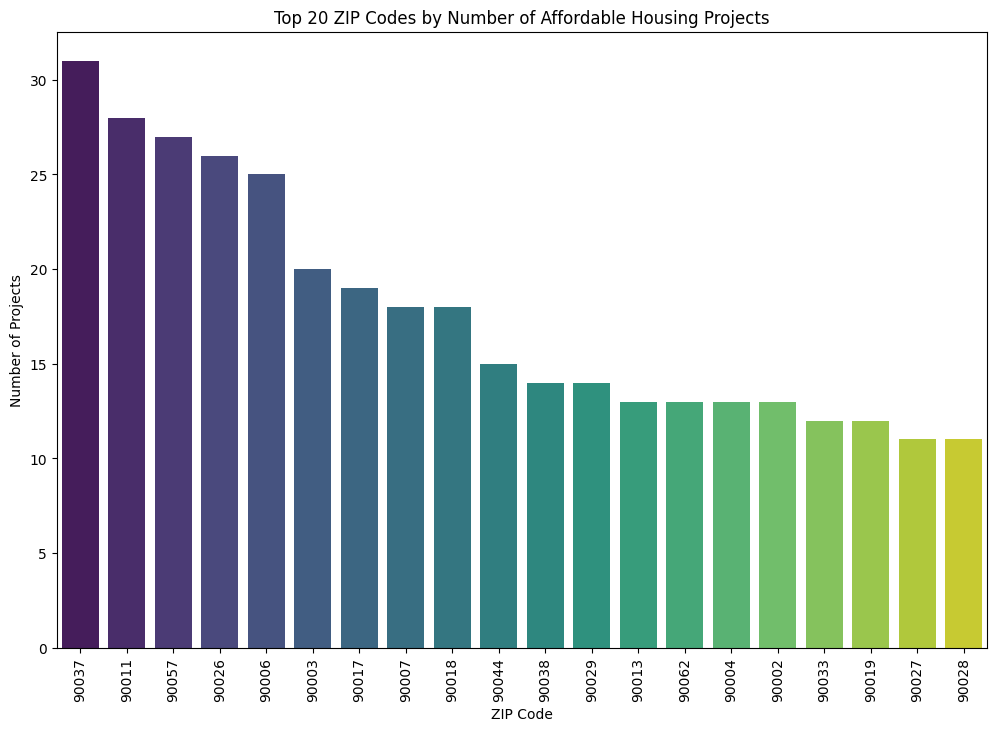

In [ ]:
# Visualize the top 20 ZIP codes with the most affordable housing projects
zip_code_projects = housing['ZIP_CODE'].value_counts()  # Count occurrences of each ZIP code in the 'ZIP_CODE' column

plt.figure(figsize=(12, 8))  # Create a new figure with a specified size
sns.barplot(x=zip_code_projects.index[:20], y=zip_code_projects.values[:20], palette='viridis', hue=zip_code_projects.index[:20], dodge=False)  # Create a bar plot for the top 20 ZIP codes by number of projects using the 'viridis' color palette
plt.title('Top 20 ZIP Codes by Number of Affordable Housing Projects')  # Set the title of the plot
plt.xlabel('ZIP Code')  # Label the x-axis as 'ZIP Code'
plt.ylabel('Number of Projects')  # Label the y-axis as 'Number of Projects'
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.legend([],[], frameon=False)  # Remove the legend to avoid unnecessary space if not needed
plt.show()  # Display the plot
#[2]

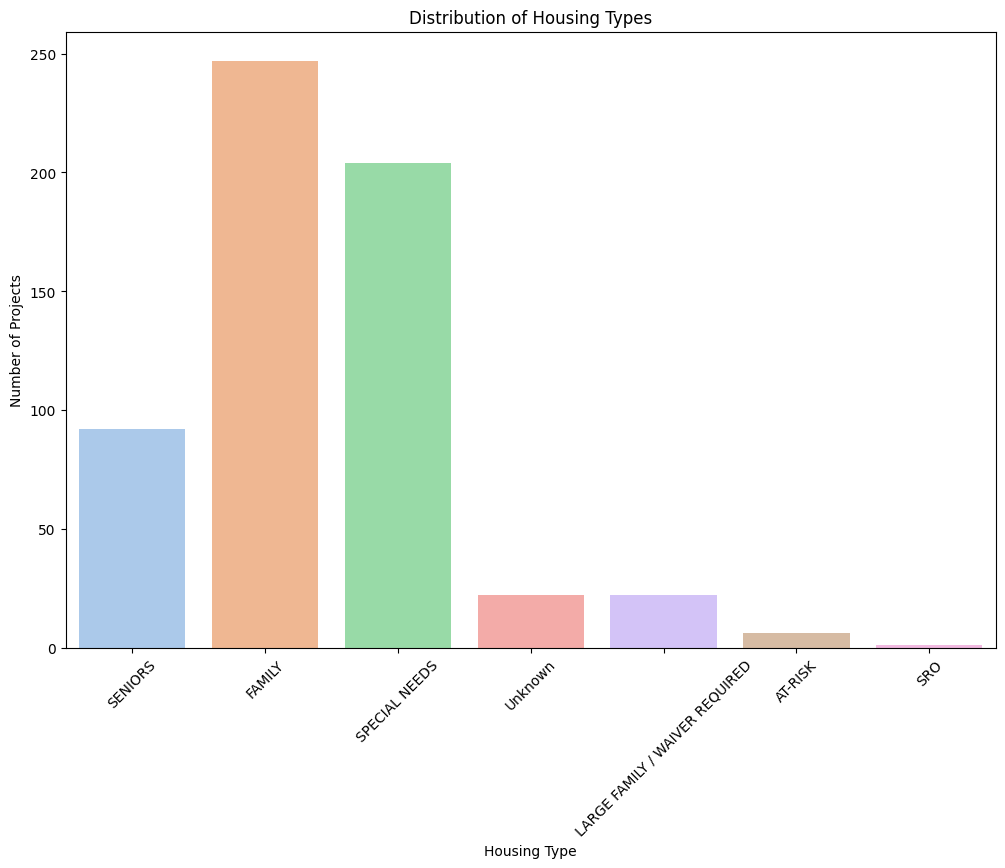

In [ ]:
# Visualize the distribution of housing types
plt.figure(figsize=(12, 8))  # Create a new figure with a specified size
sns.countplot(x='HOUSING TYPE', data=housing, palette='pastel', hue=housing['HOUSING TYPE'])  # Create a count plot of 'HOUSING TYPE' with a pastel color palette
plt.title('Distribution of Housing Types')  # Set the title of the plot
plt.xlabel('Housing Type')  # Label the x-axis as 'Housing Type'
plt.ylabel('Number of Projects')  # Label the y-axis as 'Number of Projects'
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
plt.legend([],[], frameon=False)  # Remove the legend to avoid unnecessary space if not needed
plt.show()  # Display the plot
#[2]

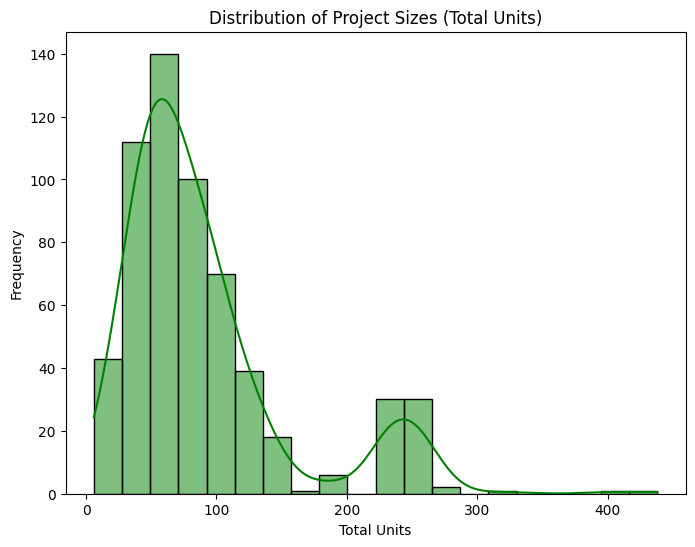

In [ ]:
# Visualize the distribution of project sizes (total units)
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
sns.histplot(housing['PROJECT TOTAL UNITS'], bins=20, kde=True, color='green')  # Create a histogram of 'PROJECT TOTAL UNITS' with 20 bins, including a KDE (Kernel Density Estimate) curve, and color the plot green
plt.title('Distribution of Project Sizes (Total Units)')  # Set the title of the plot
plt.xlabel('Total Units')  # Label the x-axis as 'Total Units'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
plt.show()  # Display the plot
#[2]

In [ ]:
# Print the column names of the housing DataFrame
print(housing.columns)  # Display the names of all columns in the housing DataFrame

Index(['APN', 'PROJECT NUMBER', 'NAME', 'DEVELOPMENT STAGE',
       'CONSTRUCTION TYPE', 'SITE ADDRESS', 'SITE  COUNCIL DISTRICT', 'SITE #',
       'SITE COMMUNITY', 'SITE UNITS', 'PROJECT TOTAL UNITS', 'HOUSING TYPE',
       'SUPPORTIVE HOUSING', 'SH UNITS PER SITE', 'DATE FUNDED', 'LAHD FUNDED',
       'LEVERAGE', 'TAX EXEMPT CONDUIT BOND', 'TDC', 'IN-SERVICE DATE',
       'DEVELOPER', 'MANAGEMENT COMPANY', 'PHOTO', 'JOBS',
       'PROJECT SUMMARY URL', 'DATE STAMP', 'SITE LONGITUDE', 'SITE LATITUDE',
       'GPS_COORDS ON MAP', 'ZIP_CODE'],
      dtype='object')


In [ ]:
# Check for missing values in specific columns
print(housing['SITE ADDRESS'].isnull().sum())  # Print the number of missing (NaN) values in the 'SITE ADDRESS' column of the housing DataFrame
print(inspection['facility_zip'].isnull().sum())  # Print the number of missing (NaN) values in the 'facility_zip' column of the inspection DataFrame

0
0


# c) Summarize each file by ZIP code using SQL: [2]
# i. Ensure the right type of summarization (sum, mean, max etc.) for the other variables

In [ ]:
import sqlite3  # Import the SQLite database library for connecting to and interacting with SQLite databases
import pandas as pd  # Import the pandas library for data manipulation and analysis

In [ ]:
# Establish a connection to an SQLite database
conn = sqlite3.connect('data_summary.db')  # Connect to the SQLite database named 'data_summary.db'. If the file does not exist, it will be created.

In [ ]:
# Load inspection data into SQLite
#inspection = pd.read_csv('restaurant_and_market_health_inspections.csv')
inspection.to_sql('inspection', conn, if_exists='replace', index=False)

# Load housing data into SQLite
#housing = pd.read_csv('hcidla_affordable_housing_projects.csv')
housing.to_sql('housing', conn, if_exists='replace', index=False)

594

In [ ]:
# Retrieve and display the schema of the 'housing' table
schema_query = "PRAGMA table_info(housing);"  # SQL query to get schema information for the 'housing' table
schema = pd.read_sql_query(schema_query, conn)  # Execute the query and load the result into a DataFrame
print(schema)  # Print the DataFrame containing the schema details of the 'housing' table
#[6][5]

    cid                     name       type  notnull dflt_value  pk
0     0                      APN    INTEGER        0       None   0
1     1           PROJECT NUMBER       TEXT        0       None   0
2     2                     NAME       TEXT        0       None   0
3     3        DEVELOPMENT STAGE       TEXT        0       None   0
4     4        CONSTRUCTION TYPE       TEXT        0       None   0
5     5             SITE ADDRESS       TEXT        0       None   0
6     6   SITE  COUNCIL DISTRICT    INTEGER        0       None   0
7     7                   SITE #    INTEGER        0       None   0
8     8           SITE COMMUNITY       TEXT        0       None   0
9     9               SITE UNITS    INTEGER        0       None   0
10   10      PROJECT TOTAL UNITS    INTEGER        0       None   0
11   11             HOUSING TYPE       TEXT        0       None   0
12   12       SUPPORTIVE HOUSING       TEXT        0       None   0
13   13        SH UNITS PER SITE    INTEGER     

In [ ]:
# Query for inspection data summary
inspection_query = """
SELECT
    facility_zip AS ZIP_CODE,
    COUNT(*) AS total_inspections,  -- Total number of inspections per ZIP code
    AVG(score) AS average_score,    -- Average score per ZIP code
    MAX(score) AS highest_score,    -- Highest score per ZIP code
    MIN(score) AS lowest_score,     -- Lowest score per ZIP code
    COUNT(CASE WHEN grade = 'A' THEN 1 END) AS grade_A_count,  -- Count of 'A' grades per ZIP code
    COUNT(CASE WHEN grade = 'B' THEN 1 END) AS grade_B_count,  -- Count of 'B' grades per ZIP code
    COUNT(CASE WHEN grade = 'C' THEN 1 END) AS grade_C_count,  -- Count of 'C' grades per ZIP code
    COUNT(CASE WHEN grade = ' ' OR grade IS NULL THEN 1 END) AS ungraded_count  -- Count of ungraded inspections per ZIP code
FROM
    inspection
GROUP BY
    facility_zip
ORDER BY
    total_inspections DESC;  -- Order results by total number of inspections in descending order
"""

# Execute the query and fetch results
inspection_summary = pd.read_sql_query(inspection_query, conn)  # Run the SQL query and load the result into a DataFrame
print(inspection_summary.head())  # Print the first few rows of the summary DataFrame
#[6]

   ZIP_CODE  total_inspections  average_score  highest_score  lowest_score  \
0     90012               2818      93.414478            100            73   
1     90028               2650      93.753208            100            70   
2     90045               2645      94.118336            100            71   
3     90015               2188      94.131627            100            70   
4     90036               2133      93.630567            100            72   

   grade_A_count  grade_B_count  grade_C_count  ungraded_count  
0           2610            202              6               0  
1           2531            113              6               0  
2           2484            150             11               0  
3           2052            126             10               0  
4           2061             70              2               0  


In [ ]:
# Query for housing data summary
housing_query = """
SELECT
    ZIP_CODE,
    COUNT(*) AS total_projects,  -- Total number of housing projects per ZIP code
    SUM(`SITE UNITS`) AS total_units,  -- Total number of units across all projects per ZIP code
    AVG(`SITE UNITS`) AS average_units_per_project,  -- Average number of units per project per ZIP code
    SUM(`LAHD FUNDED`) AS total_funding,  -- Total funding received across all projects per ZIP code
    AVG(`LAHD FUNDED`) AS average_funding_per_project,  -- Average funding per project per ZIP code
    SUM(LEVERAGE) AS total_leverage,  -- Total leverage funds across all projects per ZIP code
    AVG(LEVERAGE) AS average_leverage_per_project,  -- Average leverage per project per ZIP code
    SUM(TDC) AS total_development_cost,  -- Total development cost across all projects per ZIP code
    AVG(TDC) AS average_development_cost_per_project,  -- Average development cost per project per ZIP code
    SUM(JOBS) AS total_jobs_created,  -- Total number of jobs created across all projects per ZIP code
    AVG(JOBS) AS average_jobs_per_project  -- Average number of jobs per project per ZIP code
FROM
    housing
GROUP BY
    ZIP_CODE
ORDER BY
    total_projects DESC;  -- Order results by total number of projects in descending order
"""

# Execute the query and fetch results
housing_summary = pd.read_sql_query(housing_query, conn)  # Run the SQL query and load the result into a DataFrame
print(housing_summary.head())  # Print the first few rows of the summary DataFrame

  ZIP_CODE  total_projects  total_units  average_units_per_project  \
0    90037              31         1306                  42.129032   
1    90011              28         1007                  35.964286   
2    90057              27         1713                  63.444444   
3    90026              26         1453                  55.884615   
4    90006              25         1084                  43.360000   

   total_funding  average_funding_per_project  total_leverage  \
0   9.726077e+07                 3.137444e+06    3.789436e+08   
1   1.339928e+08                 4.785457e+06    4.830752e+08   
2   1.406567e+08                 5.209508e+06    4.701178e+08   
3   1.468631e+08                 5.648582e+06    3.561195e+08   
4   7.696415e+07                 3.078566e+06    4.165724e+08   

   average_leverage_per_project  total_development_cost  \
0                  1.222399e+07            5.341490e+08   
1                  1.725269e+07            6.827929e+08   
2          

# d) Join the files using SQL by ZIP code: [2]
# i. Ensure that the ZIP codes are in compatible formats and lengths
# ii. For each ZIP, get the predictor variable from the housing projects file, and potential predictedvariables from the health inspections file **bold text**

In [ ]:
# Query to join housing and inspection data
join_query = """
SELECT
    h.ZIP_CODE,
    h.total_projects,
    h.total_units,
    h.average_units_per_project,
    h.total_funding,
    h.average_funding_per_project,
    h.total_leverage,
    h.average_leverage_per_project,
    h.total_development_cost,
    h.average_development_cost_per_project,
    h.total_jobs_created,
    h.average_jobs_per_project,
    i.total_inspections,
    i.average_score,
    i.highest_score,
    i.lowest_score,
    i.grade_A_count,
    i.grade_B_count,
    i.grade_C_count,
    i.ungraded_count
FROM
    (SELECT
        ZIP_CODE,
        COUNT(*) AS total_projects,  -- Total number of housing projects per ZIP code
        SUM(`SITE UNITS`) AS total_units,  -- Total number of units across all projects per ZIP code
        AVG(`SITE UNITS`) AS average_units_per_project,  -- Average number of units per project per ZIP code
        SUM(`LAHD FUNDED`) AS total_funding,  -- Total funding received across all projects per ZIP code
        AVG(`LAHD FUNDED`) AS average_funding_per_project,  -- Average funding per project per ZIP code
        SUM(LEVERAGE) AS total_leverage,  -- Total leverage funds across all projects per ZIP code
        AVG(LEVERAGE) AS average_leverage_per_project,  -- Average leverage per project per ZIP code
        SUM(TDC) AS total_development_cost,  -- Total development cost across all projects per ZIP code
        AVG(TDC) AS average_development_cost_per_project,  -- Average development cost per project per ZIP code
        SUM(JOBS) AS total_jobs_created,  -- Total number of jobs created across all projects per ZIP code
        AVG(JOBS) AS average_jobs_per_project  -- Average number of jobs per project per ZIP code
     FROM
        housing
     GROUP BY
        ZIP_CODE) h
LEFT JOIN
    (SELECT
        facility_zip AS ZIP_CODE,
        COUNT(*) AS total_inspections,  -- Total number of inspections per ZIP code
        AVG(score) AS average_score,  -- Average inspection score per ZIP code
        MAX(score) AS highest_score,  -- Highest inspection score per ZIP code
        MIN(score) AS lowest_score,  -- Lowest inspection score per ZIP code
        COUNT(CASE WHEN grade = 'A' THEN 1 END) AS grade_A_count,  -- Count of 'A' grades per ZIP code
        COUNT(CASE WHEN grade = 'B' THEN 1 END) AS grade_B_count,  -- Count of 'B' grades per ZIP code
        COUNT(CASE WHEN grade = 'C' THEN 1 END) AS grade_C_count,  -- Count of 'C' grades per ZIP code
        COUNT(CASE WHEN grade = ' ' OR grade IS NULL THEN 1 END) AS ungraded_count  -- Count of ungraded inspections per ZIP code
     FROM
        inspection
     GROUP BY
        facility_zip) i
ON h.ZIP_CODE = i.ZIP_CODE  -- Perform a LEFT JOIN on the ZIP_CODE column
ORDER BY
    h.total_projects DESC;  -- Order results by the total number of projects in descending order
"""

# Execute the query and fetch the results
joined_data = pd.read_sql_query(join_query, conn)  # Run the SQL query and load the result into a DataFrame
print(joined_data.head())  # Print the first few rows of the joined DataFrame
#[8][5]

  ZIP_CODE  total_projects  total_units  average_units_per_project  \
0    90037              31         1306                  42.129032   
1    90011              28         1007                  35.964286   
2    90057              27         1713                  63.444444   
3    90026              26         1453                  55.884615   
4    90006              25         1084                  43.360000   

   total_funding  average_funding_per_project  total_leverage  \
0   9.726077e+07                 3.137444e+06    3.789436e+08   
1   1.339928e+08                 4.785457e+06    4.830752e+08   
2   1.406567e+08                 5.209508e+06    4.701178e+08   
3   1.468631e+08                 5.648582e+06    3.561195e+08   
4   7.696415e+07                 3.078566e+06    4.165724e+08   

   average_leverage_per_project  total_development_cost  \
0                  1.222399e+07            5.341490e+08   
1                  1.725269e+07            6.827929e+08   
2          

In [ ]:
# Close the connection to the SQLite database
conn.close()  # Properly close the connection to the 'data_summary.db' database to free up resources


# e) Formulate and test the hypothesis: [2]
# i. Formulate a reasonable alternative hypothesis
#ii. Formulate a null hypothesis
#iii. Select an appropriate test and significance level
# iv. Perform the test and decide if the null hypothesis should be rejected and alternativehypothesis should be accepted **bold text**

In [ ]:
# Print the column names of the joined_data DataFrame
print(joined_data.columns)  # Display the names of all columns in the joined_data DataFrame


Index(['ZIP_CODE', 'total_projects', 'total_units',
       'average_units_per_project', 'total_funding',
       'average_funding_per_project', 'total_leverage',
       'average_leverage_per_project', 'total_development_cost',
       'average_development_cost_per_project', 'total_jobs_created',
       'average_jobs_per_project', 'total_inspections', 'average_score',
       'highest_score', 'lowest_score', 'grade_A_count', 'grade_B_count',
       'grade_C_count', 'ungraded_count'],
      dtype='object')


In [ ]:
# the data types of joined_data

print(joined_data.dtypes)


ZIP_CODE                                 object
total_projects                            int64
total_units                               int64
average_units_per_project               float64
total_funding                           float64
average_funding_per_project             float64
total_leverage                          float64
average_leverage_per_project            float64
total_development_cost                  float64
average_development_cost_per_project    float64
total_jobs_created                        int64
average_jobs_per_project                float64
total_inspections                       float64
average_score                           float64
highest_score                           float64
lowest_score                            float64
grade_A_count                           float64
grade_B_count                           float64
grade_C_count                           float64
ungraded_count                          float64
dtype: object


In [ ]:
# Convert the 'ZIP_CODE' column to numeric values, handling errors and missing values
joined_data['ZIP_CODE'] = pd.to_numeric(joined_data['ZIP_CODE'], errors='coerce')  # Convert 'ZIP_CODE' to numeric, setting invalid parsing to NaN
joined_data['ZIP_CODE'] = joined_data['ZIP_CODE'].fillna(0).astype(int)  # Fill NaNs with 0 and convert the column to integer type
#[8]

In [ ]:
print(joined_data.dtypes)

ZIP_CODE                                  int64
total_projects                            int64
total_units                               int64
average_units_per_project               float64
total_funding                           float64
average_funding_per_project             float64
total_leverage                          float64
average_leverage_per_project            float64
total_development_cost                  float64
average_development_cost_per_project    float64
total_jobs_created                        int64
average_jobs_per_project                float64
total_inspections                       float64
average_score                           float64
highest_score                           float64
lowest_score                            float64
grade_A_count                           float64
grade_B_count                           float64
grade_C_count                           float64
ungraded_count                          float64
dtype: object


In [ ]:
# Print the count of missing values for each column in the joined_data DataFrame
print(joined_data.isnull().sum())  # Display the number of missing (NaN) values for each column in the joined_data DataFrame

ZIP_CODE                                 0
total_projects                           0
total_units                              0
average_units_per_project                0
total_funding                            0
average_funding_per_project              0
total_leverage                           0
average_leverage_per_project             0
total_development_cost                   0
average_development_cost_per_project     0
total_jobs_created                       0
average_jobs_per_project                 0
total_inspections                       90
average_score                           90
highest_score                           90
lowest_score                            90
grade_A_count                           90
grade_B_count                           90
grade_C_count                           90
ungraded_count                          90
dtype: int64


Possible Reasons for Missing Values After the SQL Join
Even after cleaning missing values in the inspection data, missing values might still appear in the joined dataset due to several reasons:

**No Matching ZIP Code:**
ZIP codes present in the housing data but absent in the inspection data (or vice versa) will result in NaN values for the columns from the non-matching dataset. For instance, if a ZIP code has affordable housing projects but no corresponding inspection records, the inspection-related fields will be NaN in the joined dataset.

**Different ZIP Code Formats:**
Discrepancies in ZIP code formatting between datasets (e.g., one dataset using 5-digit ZIP codes and another using 9-digit ZIP codes) can lead to unmatched rows, resulting in missing values.

**Incomplete Data in One Dataset:**
If one dataset lacks ZIP codes that are present in the other, missing values will occur in the joined dataset where data from one dataset does not have a corresponding match.

In [ ]:
# Print the number of rows in the joined_data DataFrame
print(len(joined_data))  # Display the total number of rows in the joined_data DataFrame

139


In [ ]:
# Identify ZIP codes present in one dataset but missing from the other
missing_in_inspection = joined_data[joined_data['total_inspections'].isnull()]['ZIP_CODE'].unique()  # ZIP codes with no inspection data
missing_in_housing = joined_data[joined_data['total_projects'].isnull()]['ZIP_CODE'].unique()  # ZIP codes with no housing data

print("ZIP codes missing in inspection data:", missing_in_inspection)  # Print ZIP codes missing from inspection data
print("ZIP codes missing in housing data:", missing_in_housing)  # Print ZIP codes missing from housing data
#[5]

ZIP codes missing in inspection data: [90744 91402 91343 91335 90731 91352 11301 91303 90248 91405 91605 10006
 10150 10243 10311 10345 10424 10510 10607 10634 10648 10803 10915 10966
 10991 11001 11010 11050 11408 11604 11734 11735 11800 11950 11976 12003
 12010 12015 12059 12129 12230 12360 12381 12415 12667 12831 13044 13230
 13368 13457 13574 13604 13751 14045 14142 14419 14536 14630 14649 14650
 14653 14726 14731 14801 15211 15301 15305 15320 15455 15532 16015 16304
 18425 18602 19325 19455 20116 20205 20750 21121 21300 25820 90247 90710
 90732 91040 91042 91331 91403 91606]
ZIP codes missing in housing data: []


In [ ]:
# Print the number of ZIP codes missing in inspection data
print(len(missing_in_inspection))  # Display the count of unique ZIP codes that are missing inspection data

90


Formulating Hypotheses



*   Null Hypothesis (H₀): There is no significant relationship between the total units in affordable housing projects and the average health inspection scores in a ZIP code.
*  Alternative Hypothesis (H₁): There is a significant relationship between the total units in affordable housing projects and the average health inspection scores in a ZIP code.





In [ ]:
# Fill missing values with zeros
filled_data = joined_data.fillna(0)  # Replace all missing (NaN) values in the joined_data DataFrame with zeros

# Proceed with correlation analysis
from scipy.stats import pearsonr  # Import the pearsonr function from scipy.stats for calculating Pearson correlation

x = filled_data['total_units']  # Define 'x' as the 'total_units' column
y = filled_data['average_score']  # Define 'y' as the 'average_score' column

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = pearsonr(x, y)  # Compute the Pearson correlation coefficient and p-value between 'total_units' and 'average_score'

print("Pearson Correlation Coefficient:", pearson_corr)  # Print the Pearson correlation coefficient
print("Pearson P-Value:", pearson_p_value)  # Print the p-value associated with the Pearson correlation coefficient
#[3]


Pearson Correlation Coefficient: 0.553088262825474
Pearson P-Value: 1.6607107737658564e-12


Interpreting the Pearson Correlation Results

1. Pearson Correlation Coefficient (0.553)

Interpretation: The Pearson Correlation Coefficient of 0.553 signifies a moderate positive correlation between the total units in affordable housing projects and the average health inspection scores in a ZIP code. This implies that as the number of affordable housing units increases, the average health inspection score tends to increase as well. While this correlation is not perfect (a value of 1), it is strong enough to be noticeable.
2. Pearson P-Value (1.66e-12)

Interpretation: The P-Value of 1.66e-12 is extremely small, indicating that the observed correlation is statistically significant. This very low probability suggests that the correlation is unlikely to have occurred by chance, allowing us to confidently reject the null hypothesis that no correlation exists.


Conclusion Based on the Results

Reject the Null Hypothesis: Given the extremely low P-value, we reject the null hypothesis in favor of the alternative hypothesis.
Moderate Positive Correlation: The moderate positive correlation suggests that ZIP codes with more affordable housing units tend to have slightly higher health inspection scores for restaurants. However, this relationship is not very strong.

# **2. Open-ended: Find some interesting data from Indian government data portal https://www.data.gov.inand perform EDA, derive some insights using graphs, and perform a statistical test for an interestinghypothesis. No need to use multiple files for this question, unless you want to do the extra work for yourown learning. [4]**

In [4]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis.

df = pd.read_csv(
    'https://www.data.gov.in/files/ogdpv2dms/s3fs-public/Report-145-20042015021220441PM-2011-2012.csv',
    # Reading a CSV file directly from a URL using pandas' read_csv function.
    sep=',',
    # Specifying that the separator used in the CSV file is a comma (default behavior, but explicitly stated here).
    encoding='ISO-8859-1',
    # Specifying the character encoding used in the CSV file, which is ISO-8859-1.
    low_memory=False
    # Disabling low memory mode to ensure that the data is read correctly,
    # even if it requires more memory. This is useful for large datasets.
)


Selected the students turn in data for different colleges

In [7]:
df.head()# Displays the first five rows of the DataFrame 'df'.

,Sr. No.,State Name,Univesity Name / Body Type,College/Stand Alone Institution,Appeared - Male,Appeared - Female,Passed - Male,Passed - Female,Passed with 60% or more - Male,Passed with 60% or more - Female
0,1,Andaman and Nicobar Islands,"Pondicherry Univeristy, Puducherry",Dr.B.R. Ambedkar Institute of Technology,175.0,62.0,118,35,93.0,23.0
1,2,Andaman and Nicobar Islands,"Pondicherry Univeristy, Puducherry",Zoological Survey of India,5.0,0.0,0,0,0.0,0.0
2,3,Andaman and Nicobar Islands,"Pondicherry Univeristy, Puducherry",Tagore Government College of Education,27.0,102.0,27,102,19.0,94.0
3,4,Andaman and Nicobar Islands,"Pondicherry Univeristy, Puducherry",Regional Medical Research Institute (I.C.M.R.),4.0,1.0,4,1,4.0,1.0
4,5,Andhra Pradesh,"A.P. Horticulture University Venkannagudem, T....",NaN,226.0,206.0,184,182,105.0,105.0


In [8]:
print(df.dtypes)

Sr. No.                              object
State Name                           object
Univesity Name / Body Type           object
College/Stand Alone Institution      object
Appeared - Male                     float64
Appeared - Female                   float64
Passed - Male                         int64
Passed - Female                       int64
Passed with 60% or more - Male      float64
Passed with 60% or more - Female    float64
dtype: object


In [9]:
df.columns

Index(['Sr. No.', 'State Name', 'Univesity Name / Body Type',
       'College/Stand Alone Institution', 'Appeared - Male',
       'Appeared - Female', 'Passed - Male', 'Passed - Female',
       'Passed with 60% or more - Male', 'Passed with 60% or more - Female'],
      dtype='object')

In [11]:
print(len(df))


27502


In [12]:
# Group the DataFrame by 'State_UT' and calculate the sum of 'Enrolment_Males' and 'Enrolment_Females' for each state
state_enrollment = df.groupby('State Name')[['Appeared - Male', 'Appeared - Female']].sum()

# Sort the resulting DataFrame by the total enrollment (sum of males and females) in descending order
sorted_state_enrollment = state_enrollment.sort_values(by=['Appeared - Male', 'Appeared - Female'], ascending=False)

# Display the sorted DataFrame
print(sorted_state_enrollment)


                             Appeared - Male  Appeared - Female
State Name                                                     
All Institution                    5383023.0          4558223.0
Tamil Nadu                          790074.0           683130.0
Uttar Pradesh                       659652.0           638842.0
Maharashtra                         606422.0           454035.0
Karnataka                           424821.0           394141.0
West Bengal                         319500.0           250924.0
Gujarat                             311878.0           249577.0
Madhya Pradesh                      300938.0           261147.0
Rajasthan                           282893.0           181973.0
Telangana                           255855.0           244279.0
Bihar                               245836.0           160778.0
Andhra Pradesh                      212682.0           175244.0
Delhi                               170952.0            50555.0
Punjab                              1284

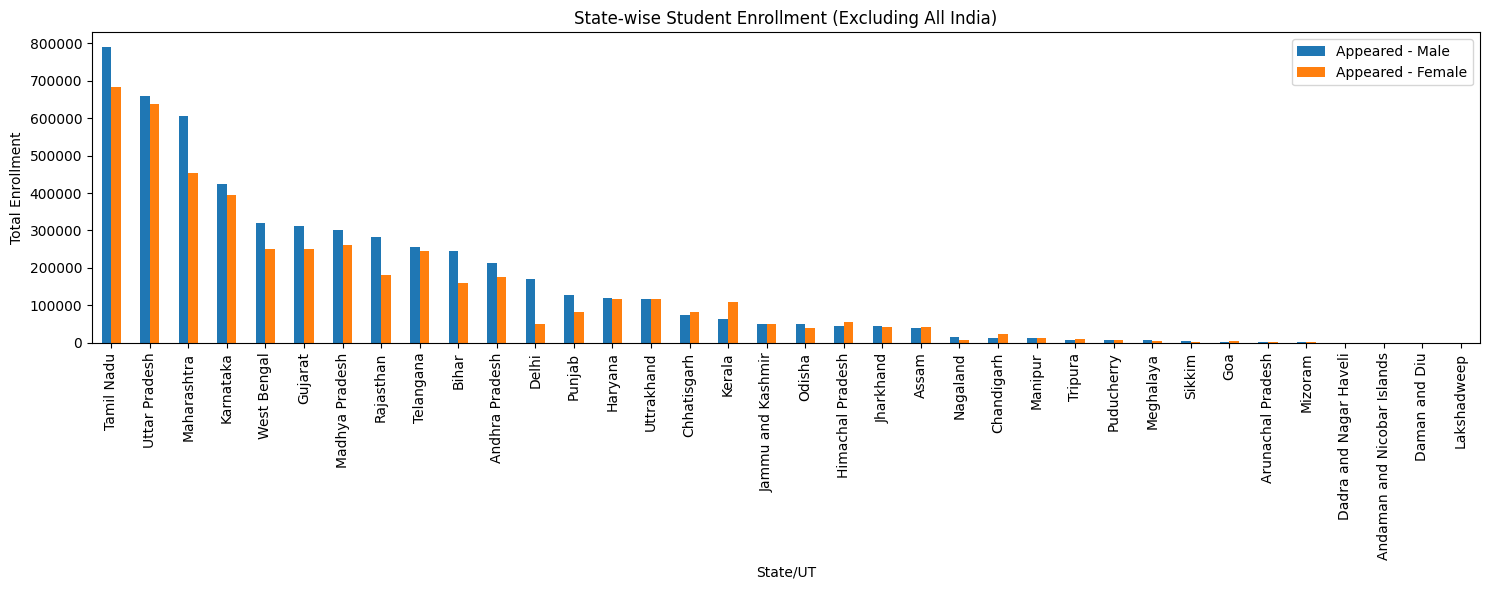

In [14]:
import matplotlib.pyplot as plt
# Exclude 'All India' from the DataFrame
state_enrollment_excluding_all_india = state_enrollment.drop('All Institution', errors='ignore')

# Sort the DataFrame by total enrollment (males + females) in descending order
sorted_state_enrollment_excluding_all_india = state_enrollment_excluding_all_india.sort_values(
    by=['Appeared - Male', 'Appeared - Female'], ascending=False
)

# Plot the bar chart
sorted_state_enrollment_excluding_all_india.plot(kind='bar', figsize=(15, 6))
plt.title('State-wise Student Enrollment (Excluding All India)')
plt.xlabel('State/UT')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
kerala_colleges = df[df['State Name'] == 'Kerala']['Univesity Name / Body Type'].unique()
print(kerala_colleges)


['Calicut University, Thenhipalem, Malapuram'
 'Central Univeristy of Kerala, Trivandrum'
 'Cochin University of Science and Technology, Kochi'
 'Indian Institute of Science Education and Research (IISER), Thiruvananthapuram'
 'Indian Institute of Space Science and Technology, Thiruvananthapuram'
 'Kannur University, Kannur' 'Kerala Agricultural University, Thrissur'
 'Kerala Kalamandalam, Thrissur'
 'Kerala University of Fisheries and Ocean Studies, Kochi'
 'Kerala University, Thiruvananthapuram'
 'Kerala Veterinary and Animal Science University, Wayanad'
 'Mahatma Gandhi University, Kottayam'
 'National Institute of Technology, Calicut'
 'National University of Advanced Legal Studies, Kochi'
 'Shree Sankaracharya Univeristy of Sanskrit, Kalady'
 'Sree Chitra Tirunal Institute for Medical Sciences and Technology, Thiruvananthapuram'
 'KERALA UNIVERSITY OF HEALTH AND ALLIED SCIENCES' 'Teacher Training'
 'Nursing' 'Technical/Polytechnic'
 'Rashtriya Sanskrit Sansthan, New Delhi'
 'Indir

In [19]:

# Group the DataFrame by 'Univesity Name / Body Type' and sum the 'Appeared - Male' and 'Appeared - Female' columns
college_enrollment = df[df['State Name'] == 'Kerala'].groupby('Univesity Name / Body Type')[['Appeared - Male', 'Appeared - Female']].sum()

# Sort the resulting DataFrame by the total enrollment (sum of males and females) in descending order
sorted_college_enrollment = college_enrollment.sort_values(by=['Appeared - Male', 'Appeared - Female'], ascending=False)

# Display the sorted DataFrame
print(sorted_college_enrollment)

# Extract the college with the highest total enrollment
highest_enrollment_college = sorted_college_enrollment.index[0]

print("\nCollege with highest student appearance in Kerala:", highest_enrollment_college)


                                                    Appeared - Male  \
Univesity Name / Body Type                                            
Mahatma Gandhi University, Kottayam                         18213.0   
Kerala University, Thiruvananthapuram                       12547.0   
Calicut University, Thenhipalem, Malapuram                  12465.0   
Technical/Polytechnic                                        7815.0   
Cochin University of Science and Technology, Kochi           5050.0   
Kannur University, Kannur                                    3925.0   
National Institute of Technology, Calicut                     864.0   
KERALA UNIVERSITY OF HEALTH AND ALLIED SCIENCES               488.0   
Institutes under Ministries                                   452.0   
Shree Sankaracharya Univeristy of Sanskrit, Kalady            235.0   
Nursing                                                       209.0   
Kerala Agricultural University, Thrissur                      202.0   
Teache

In [21]:

# Group the DataFrame by 'Univesity Name / Body Type' and sum the 'Appeared - Male' and 'Appeared - Female' columns, excluding 'All Institution'
college_enrollment = df[df['Univesity Name / Body Type'] != 'All Institution'].groupby('Univesity Name / Body Type')[['Appeared - Male', 'Appeared - Female']].sum()

# Sort the resulting DataFrame by the total enrollment (sum of males and females) in descending order
sorted_college_enrollment = college_enrollment.sort_values(by=['Appeared - Male', 'Appeared - Female'], ascending=False)

# Display the top 10 colleges with the highest enrollment
print(sorted_college_enrollment.head(10))


                                                    Appeared - Male  \
Univesity Name / Body Type                                            
Technical/Polytechnic                                      366615.0   
Chatrapati Sahuji Maharaj Kanpur University, Ka...         255483.0   
Mumbai University Mumbai                                   128585.0   
Pune University, Pune                                      123742.0   
University of Delhi                                         95855.0   
Teacher Training                                            79992.0   
Annamalai University, Annamalainagar                        78283.0   
Alagappa University, Alagappa Nagar, Karaikudi              70322.0   
Osmania University, Hyderabad                               69556.0   
Veer Kunwar Singh University, Arrah                         67852.0   

                                                    Appeared - Female  
Univesity Name / Body Type                                             
Tec

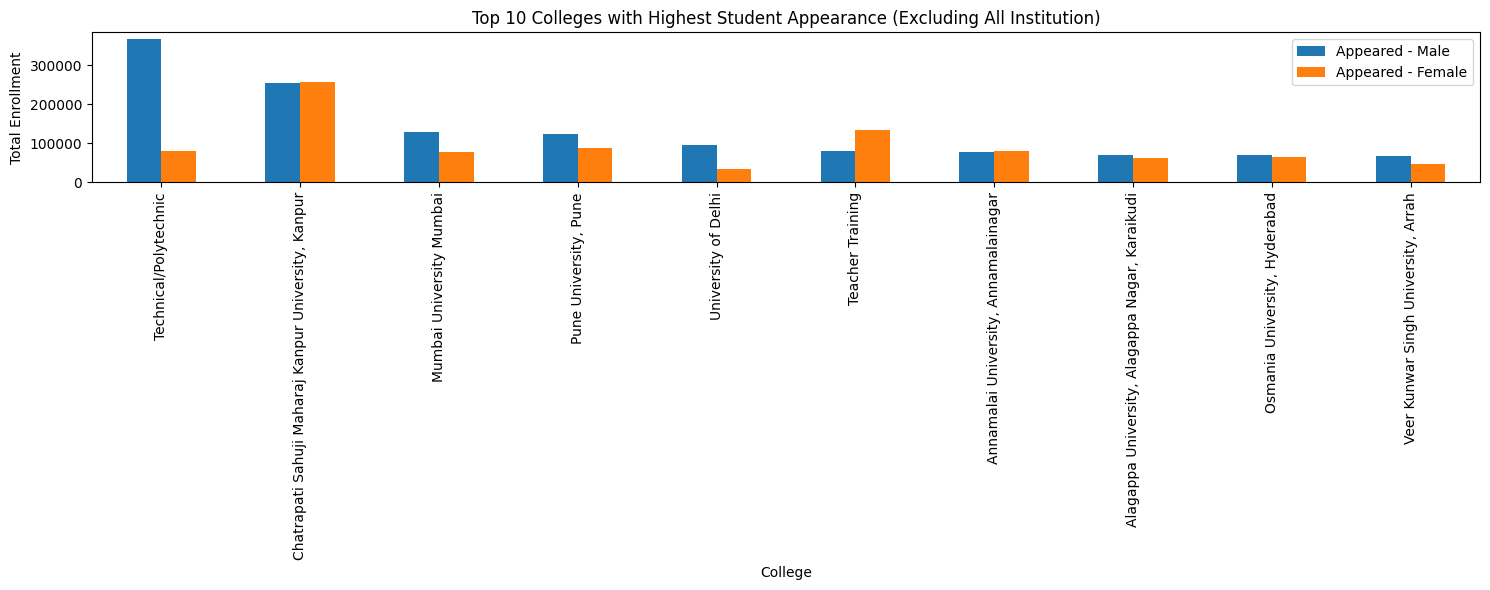

In [22]:

import matplotlib.pyplot as plt
# Plot the bar chart for top 10 colleges with highest enrollment
sorted_college_enrollment.head(10).plot(kind='bar', figsize=(15, 6))
plt.title('Top 10 Colleges with Highest Student Appearance (Excluding All Institution)')
plt.xlabel('College')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [25]:

# Calculate pass percentage for each state, excluding 'All Institution'
state_pass_percentage = df[df['Univesity Name / Body Type'] != 'All Institution'].groupby('State Name').apply(
    lambda x: (x['Passed - Male'].sum() + x['Passed - Female'].sum()) / (x['Appeared - Male'].sum() + x['Appeared - Female'].sum()) * 100
)

# Sort the resulting Series by pass percentage in descending order
sorted_state_pass_percentage = state_pass_percentage.sort_values(ascending=False)

# Display the sorted pass percentages
print(sorted_state_pass_percentage)


State Name
Sikkim                         92.913009
Jharkhand                      87.274085
Uttar Pradesh                  87.082266
Goa                            87.030411
Mizoram                        86.520600
Manipur                        86.319177
Bihar                          85.173162
Rajasthan                      85.060641
Chandigarh                     84.150866
Puducherry                     82.169091
Odisha                         81.896079
Delhi                          80.733340
Tripura                        79.258816
Kerala                         79.106268
Gujarat                        78.673625
Madhya Pradesh                 77.765818
Dadra and Nagar Haveli         76.988636
West Bengal                    76.818121
Andaman and Nicobar Islands    76.329787
Daman and Diu                  74.518201
Lakshadweep                    74.358974
Uttrakhand                     73.788735
Assam                          73.639636
Jammu and Kashmir              73.031783
Aruna

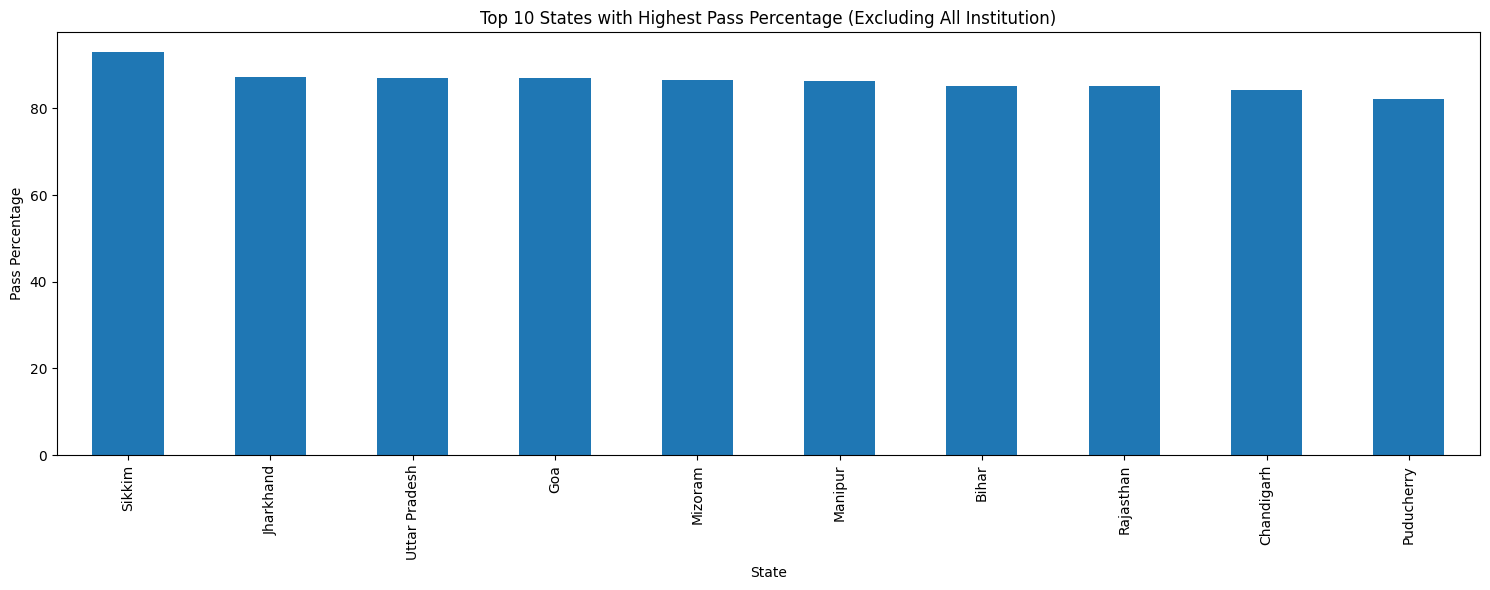

In [26]:

import matplotlib.pyplot as plt
# Plot the bar chart for top 10 states with highest pass percentage
sorted_state_pass_percentage.head(10).plot(kind='bar', figsize=(15, 6))
plt.title('Top 10 States with Highest Pass Percentage (Excluding All Institution)')
plt.xlabel('State')
plt.ylabel('Pass Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


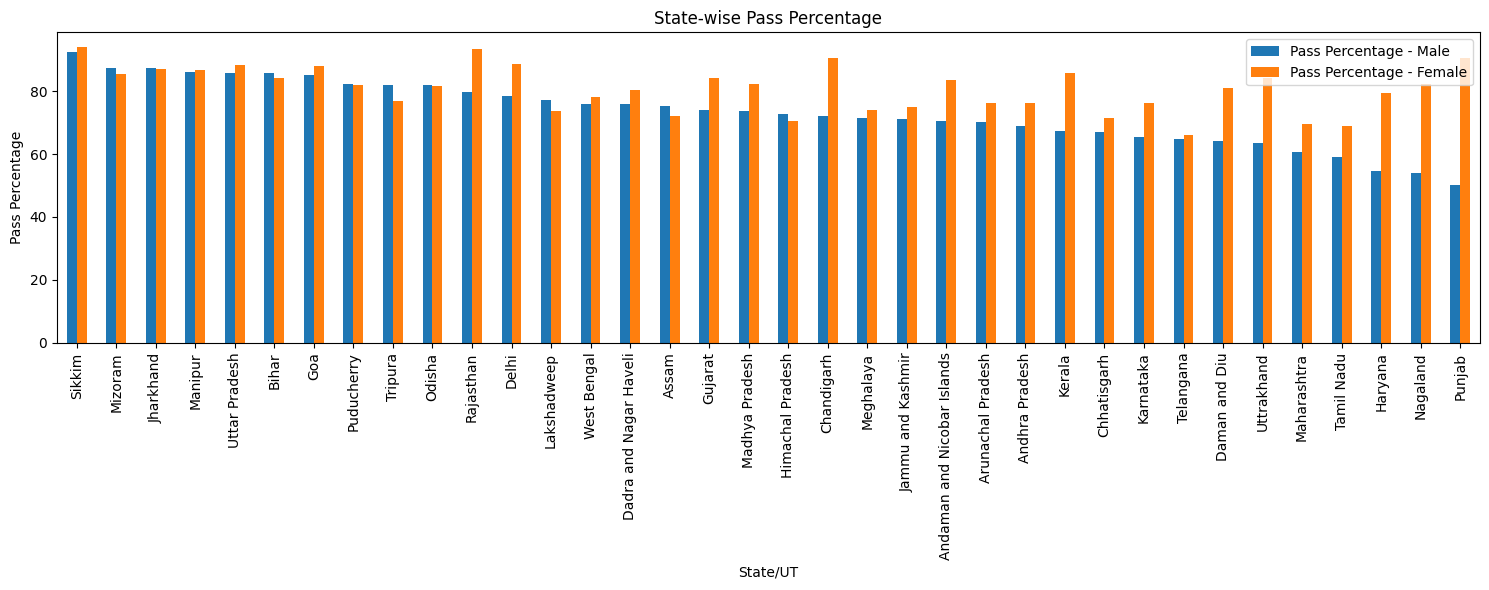

T-statistic: -3.7199551202235894
P-value: 0.0003917703900938923
Reject the null hypothesis. There is a significant difference in pass percentages between males and females.


In [16]:

import matplotlib.pyplot as plt
# Calculate the pass percentage for each state
state_enrollment['Pass Percentage - Male'] = (df.groupby('State Name')['Passed - Male'].sum() / df.groupby('State Name')['Appeared - Male'].sum()) * 100
state_enrollment['Pass Percentage - Female'] = (df.groupby('State Name')['Passed - Female'].sum() / df.groupby('State Name')['Appeared - Female'].sum()) * 100

# Sort the DataFrame by pass percentage in descending order
sorted_state_pass_percentage = state_enrollment.sort_values(by=['Pass Percentage - Male', 'Pass Percentage - Female'], ascending=False)

# Exclude 'All India' from the DataFrame
sorted_state_pass_percentage = sorted_state_pass_percentage.drop('All Institution', errors='ignore')

# Plot the bar chart for pass percentage
sorted_state_pass_percentage[['Pass Percentage - Male', 'Pass Percentage - Female']].plot(kind='bar', figsize=(15, 6))
plt.title('State-wise Pass Percentage')
plt.xlabel('State/UT')
plt.ylabel('Pass Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Perform a t-test to compare the pass percentages of males and females
from scipy.stats import ttest_ind

male_pass_percentage = state_enrollment['Pass Percentage - Male'].dropna()
female_pass_percentage = state_enrollment['Pass Percentage - Female'].dropna()

t_statistic, p_value = ttest_ind(male_pass_percentage, female_pass_percentage)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in pass percentages between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in pass percentages between males and females.")


# **REFERENCES**

**Code without marking is written by me without any copying**
1. Pandas Documentation
2. Matplotlib Documentation
3. Scipy Documentation
4. Seaborn Documentation
5. Discussion with Nived S (23M0130)
6. ChatGpt
7. Extracting ZIP codes using regex and Pandas - ChatGPT prompt and personal knowledge (based on standard regex practices and Pandas DataFrame operations).
8. ChatGPT prompt: How to join two SQL tables and aggregate data



